## Multi series forecast using LSTM. 17 April 2021

##  2-2 Time series forecast using LSTM neural network with Keras and Tensorflow in Anaconda

### 1. Load required libraries

In [1]:
%cd C:\Pablo UK\46 DATA SCIENCE all\ANACONDA Jupyter project

C:\Pablo UK\46 DATA SCIENCE all\ANACONDA Jupyter project


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [5]:
# Install scikit-learn
!pip install -U scikit-learn

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## I need to install Keras and Tensorflow

In [7]:
!pip install Keras

In [8]:
!pip install tensorflow

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\pablo\\.conda\\envs\\tensorenv\\lib\\site-packages\\~cipy\\fft\\_pocketfft\\pypocketfft.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
pip show tensorflow

Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\pablo\.conda\envs\tensorenv\lib\site-packages
Requires: tensorflow-estimator, scipy, opt-einsum, protobuf, tensorboard, termcolor, wrapt, keras-applications, six, gast, wheel, numpy, keras-preprocessing, google-pasta, astor, absl-py, grpcio
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


Now we have Tensorflow installed

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
## Get my working directory
import os
path = os.getcwd()

In [17]:
os.chdir('C:/Pablo UK/46 DATA SCIENCE all/44 Python')

In [18]:
Sales_input = pd.read_csv('SalesP.csv') 

In [19]:
Sales_input.head()

,PERIOD,Orgname,StoreCode,Sales2
0,06/01/2016,East coast branch,LA2,154.0
1,07/01/2016,East coast branch,LA2,180.0
2,08/01/2016,East coast branch,LA2,175.0
3,09/01/2016,East coast branch,LA2,180.0
4,10/01/2016,East coast branch,LA2,213.0


1. Check for missing values in this Sales dataset

In [20]:
sum(pd.isnull(Sales_input['Sales2']))

2

## Load Sales clean dataset

In [ ]:
# Sales_clean.to_csv (r'Sales_clean_plot_csv.csv', index = False, header=True)

In [26]:
Sales_clean  = pd.read_csv('Sales_clean_plot_csv.csv') 

In [27]:
pivot = Sales_clean.copy()

In [28]:
pivot.head()

,PERIOD,Orgname,StoreCode,Sales
0,2016-05-30,East coast branch,LA2,145.0
1,2016-05-31,East coast branch,LA2,158.0
2,2016-06-01,East coast branch,LA2,154.0
3,2016-06-02,East coast branch,LA2,152.0
4,2016-06-03,East coast branch,LA2,147.0


In [29]:
SalesP = pd.pivot_table(Sales_clean, 
                        values = 'Sales', 
                        index=['PERIOD'], 
                        columns = 'Orgname').reset_index()

In [30]:
SalesP['PERIOD'] = pd.to_datetime(SalesP['PERIOD'])

In [31]:
SalesP.set_index("PERIOD",inplace=True)

<AxesSubplot:xlabel='PERIOD'>

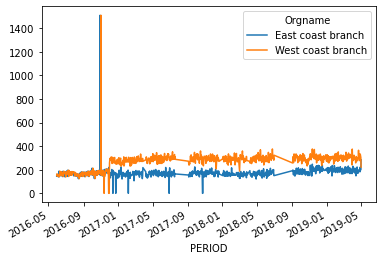

In [32]:
SalesP.plot()

Check number of missing values

In [33]:
sum(pd.isnull(SalesP['East coast branch']))

1

Use dropna() function to remove missing values from data set

In [34]:
SalesP_clean = SalesP.dropna(subset = ['East coast branch'])

In [35]:
sum(pd.isnull(SalesP['East coast branch']))

1

Check missing values

In [36]:
bool_SalesP = pd.isnull(SalesP["East coast branch"]) 

In [37]:
SalesP[bool_SalesP] 

Orgname,East coast branch,West coast branch
PERIOD,,
2016-11-11,NaN,169.0


In [38]:
# fill missing values with mean column values
SalesP.fillna(SalesP.mean(), inplace=True)

In [39]:
sum(pd.isnull(SalesP['East coast branch']))

0

In [40]:
sum(pd.isnull(SalesP['West coast branch']))

0

### 9.2 Plot each TS

In [41]:
values = SalesP.values

In [42]:
values

array([[145.        , 152.        ],
       [158.        , 164.        ],
       [154.        , 267.77593819],
       ...,
       [196.        , 315.        ],
       [211.        , 304.        ],
       [284.        , 222.        ]])

In [43]:
SalesP.head()

Orgname,East coast branch,West coast branch
PERIOD,,
2016-05-30,145.0,152.000000
2016-05-31,158.0,164.000000
2016-06-01,154.0,267.775938
2016-06-02,152.0,145.000000
2016-06-03,147.0,158.000000


#### 9.2.1 First layout to plot multivariate TS data 

In [48]:
from matplotlib import pyplot

In [49]:
# specify columns to plot. We have just two columns
groups = [0, 1]
i = 1

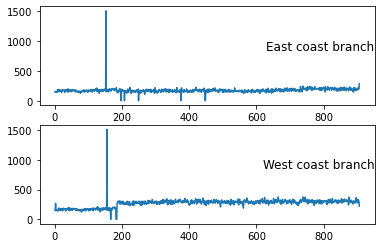

In [50]:
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(SalesP.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [51]:
SalesP.head()

Orgname,East coast branch,West coast branch
PERIOD,,
2016-05-30,145.0,152.000000
2016-05-31,158.0,164.000000
2016-06-01,154.0,267.775938
2016-06-02,152.0,145.000000
2016-06-03,147.0,158.000000


#### 9.2.2 Second layout to plot multivariate TS data 

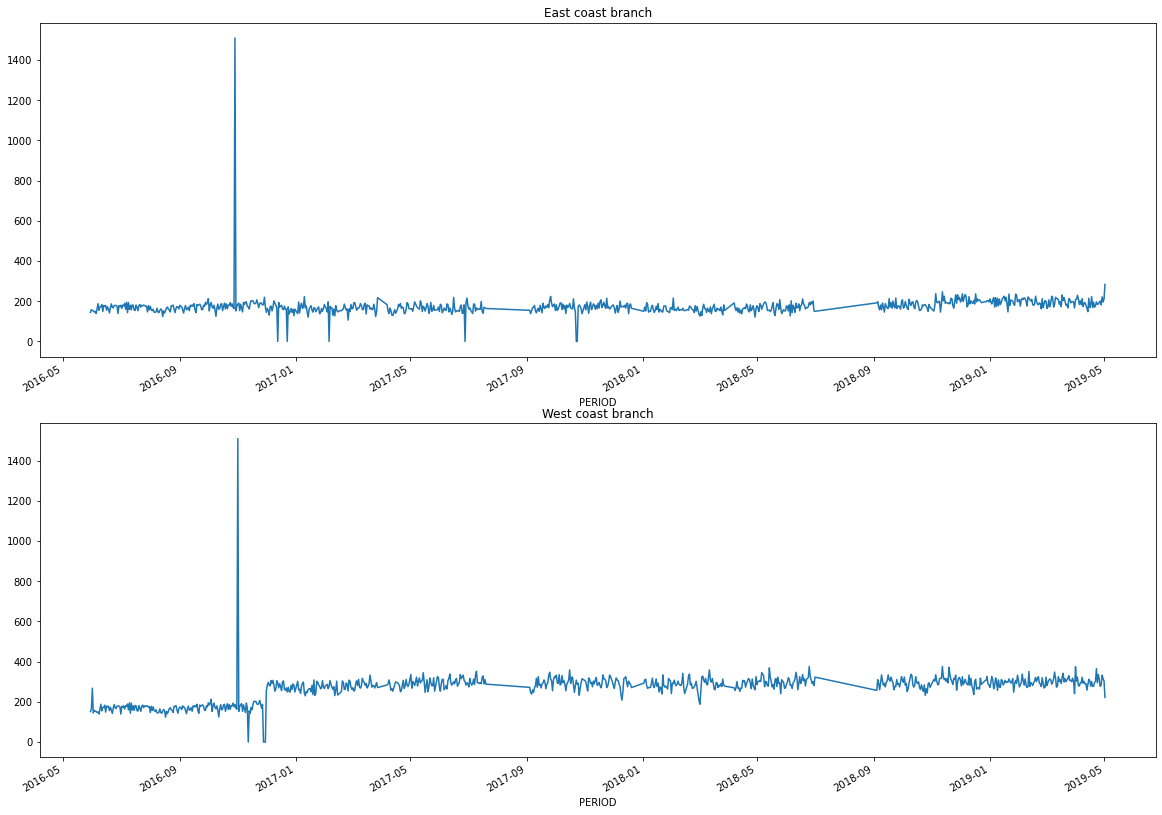

In [52]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
for i,column in enumerate([col for col in SalesP.columns]):
    SalesP[column].plot(ax=ax[i])
    ax[i].set_title(column)

In [53]:
# Rename variables
#Sales.rename(columns={'Prev_var_name ':'New_var_name'}, inplace=True)
SalesP.rename(columns={'East coast branch':'Eastbranch'},inplace=True)

In [54]:
SalesP.rename(columns={'West coast branch':'Westbranch'},inplace=True)

In [55]:
SalesP.head()

Orgname,Eastbranch,Westbranch
PERIOD,,
2016-05-30,145.0,152.000000
2016-05-31,158.0,164.000000
2016-06-01,154.0,267.775938
2016-06-02,152.0,145.000000
2016-06-03,147.0,158.000000


Find max value in Eastbranch colum

In [56]:
SalesP.loc[SalesP['Eastbranch'].idxmax()]

Orgname
Eastbranch    1510.0
Westbranch     187.0
Name: 2016-10-29 00:00:00, dtype: float64

In [57]:
SalesP.loc[SalesP['Westbranch'].idxmax()]

Orgname
Eastbranch     185.0
Westbranch    1510.0
Name: 2016-11-01 00:00:00, dtype: float64

In [ ]:
# boolean_condition = df.A > 3
# column_name = "A"
# new_value = 500

# df.loc[boolean_condition, column_name] = new_value

In [58]:
SalesQ = SalesP.copy()

Replace extreme values by average (aprox)

In [59]:
# boolean_condition = df.A > 3
# column_name = "A"
# new_value = 500
# East coast branch', West coast branch
SalesQ.loc[SalesQ.Eastbranch >1000,"Eastbranch"] = 300

In [60]:
SalesQ.loc[SalesQ.Westbranch >1000,"Westbranch"] = 300

Plot the two time series again

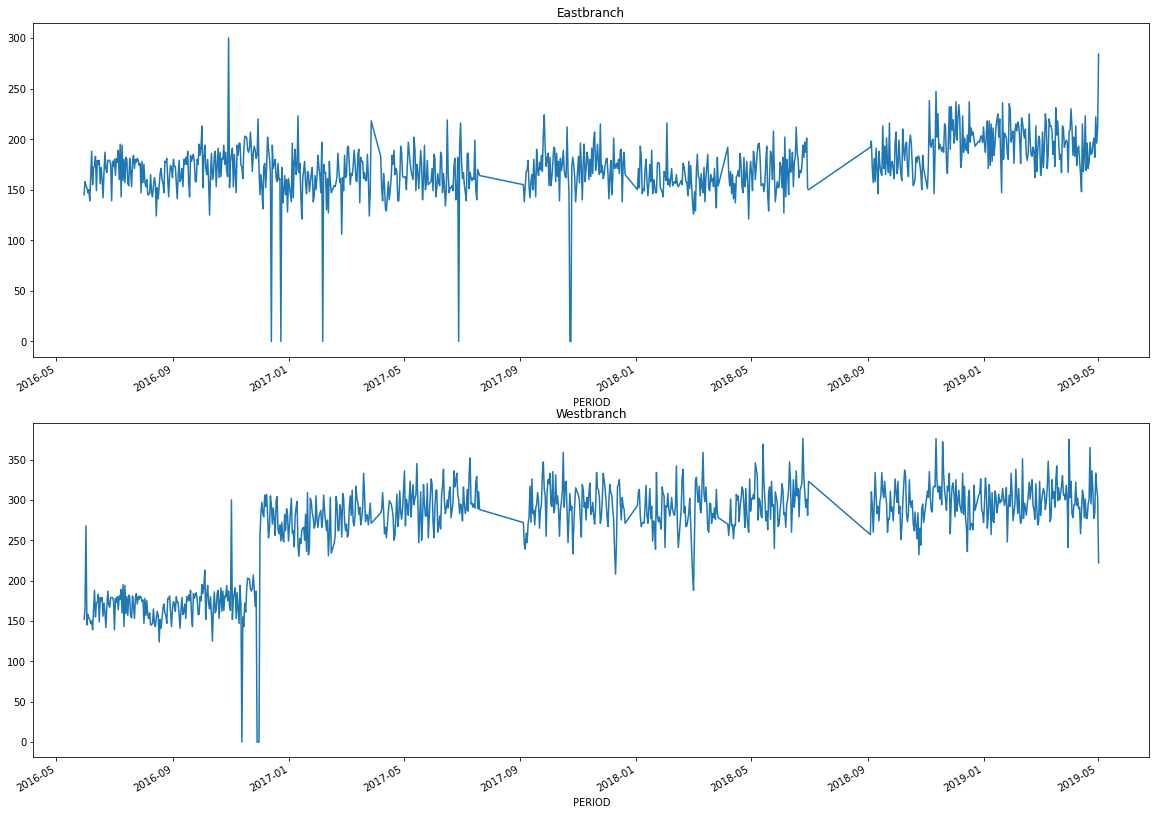

In [61]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
for i,column in enumerate([col for col in SalesQ.columns]):
    SalesQ[column].plot(ax=ax[i])
    ax[i].set_title(column)

We can also take carae of extreme low values

In [62]:
SalesQ.loc[SalesQ.Eastbranch <50,"Eastbranch"] = 150

In [63]:
SalesQ.loc[SalesQ.Westbranch <100,"Westbranch"] = 200

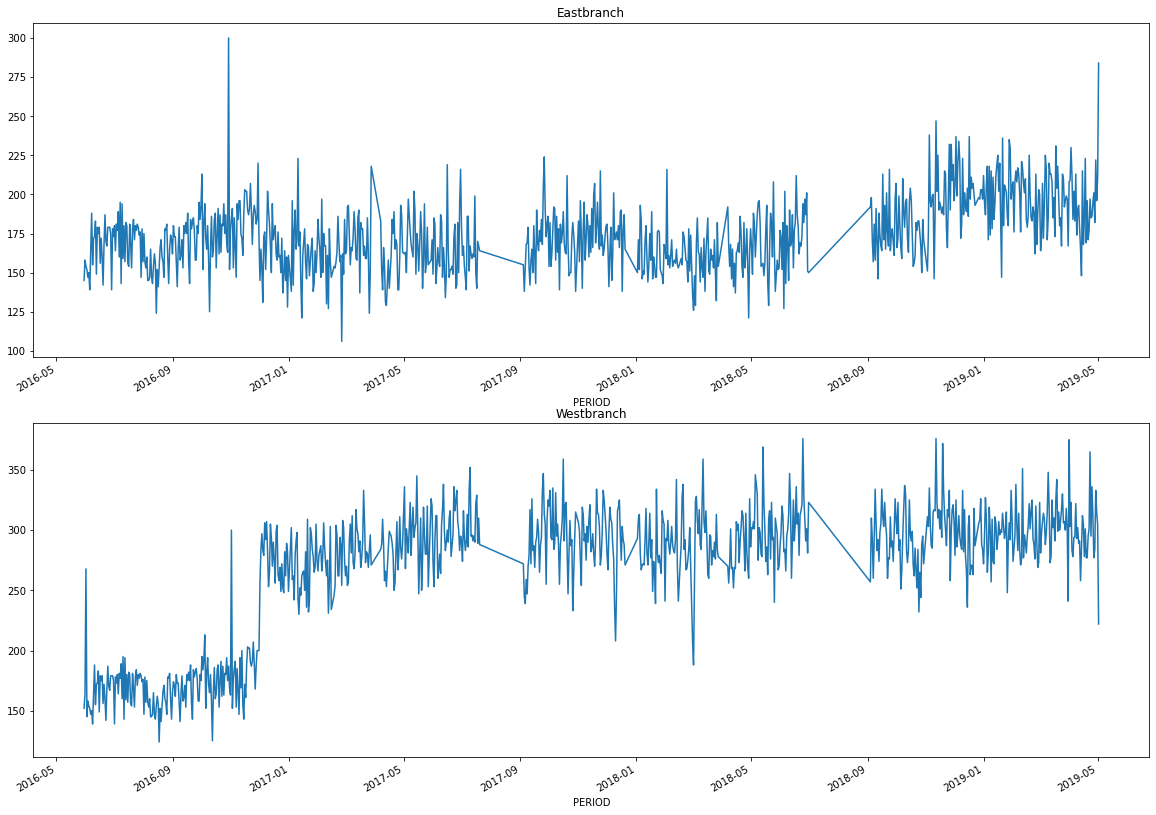

In [64]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
for i,column in enumerate([col for col in SalesQ.columns]):
    SalesQ[column].plot(ax=ax[i])
    ax[i].set_title(column)

In [65]:
SalesQ.to_csv (r'SalesQ_READYTOMODEL.csv', index = False, header=True)

In [66]:
## Get my working directory
import os
path = os.getcwd()

In [67]:
path

'C:\\Pablo UK\\46 DATA SCIENCE all\\44 Python'

## 10. MODELING MULTIVARIATE TIME SERIES IN PYTHON > 17 April 2021

When forecasting multivariate data, we have several multiple observations of several measures. In this instance, we have two time series, one for Eastbranch and another for Westbranch, and we are interested in forecastig both of them. 

* Multivaraite data: Several time series on the same dataset

This is where we may have observations of multiple different measures and an interest in forecasting one or more of them.

### LSTM Data Preparation

In [68]:
from pandas import DataFrame
from pandas import concat

In [69]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

Below is an example of a reframing with 1 time step as input and 1 time steps as forecast sequence.

In [70]:
raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
datat = series_to_supervised(values,1,1)
print(datat)

   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        0.0       50.0        1       51
2        1.0       51.0        2       52
3        2.0       52.0        3       53
4        3.0       53.0        4       54
5        4.0       54.0        5       55
6        5.0       55.0        6       56
7        6.0       56.0        7       57
8        7.0       57.0        8       58
9        8.0       58.0        9       59


 *Applied to our dataset, we take two past periods (lags) as input and we will forecast 2 periods into the future 
    In the previous steps we have learned how to How to reframe multivariate time series multi-step supervised learning problems.

**multi-step forecasting**

*multivariate time series*

This is where we may have observations of multiple different measures and an interest in forecasting one or more of them.

A different type of forecasting problem is using *past observations* to forecast a sequence of *future observations*.

This may be called sequence forecasting or multi-step forecasting.

Below is an example of a reframing with 5 time step as input and 2 time steps as forecast sequence. Two past observations to forecast two future observations

In [99]:
datat = series_to_supervised(values, 5, 2)
print(datat)

     var1(t-5)  var2(t-5)  var1(t-4)  var2(t-4)  var1(t-3)  var2(t-3)  \
5        145.0       10.0      158.0       22.0      154.0       95.0   
6        158.0       22.0      154.0       95.0      152.0        6.0   
7        154.0       95.0      152.0        6.0      147.0       16.0   
8        152.0        6.0      147.0       16.0      150.0       12.0   
9        147.0       16.0      150.0       12.0      139.0       10.0   
..         ...        ...        ...        ...        ...        ...   
901      177.0      129.0      197.0      175.0      185.0      123.0   
902      197.0      175.0      185.0      123.0      186.0      164.0   
903      185.0      123.0      186.0      164.0      195.0      140.0   
904      186.0      164.0      195.0      140.0      201.0      105.0   
905      195.0      140.0      201.0      105.0      182.0      112.0   

     var1(t-2)  var2(t-2)  var1(t-1)  var2(t-1)  var1(t)  var2(t)  var1(t+1)  \
5        152.0        6.0      147.0       

*Example with our own data*

#### Below is an example of a reframing with 5 time step as input (t-5) and 3 time steps as forecast sequence(t+1,t+2,t+3). Five past observations to forecast seven future observations

In [100]:
data = series_to_supervised(SalesQ, 5, 7)

In [101]:
data

,var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),...,var1(t+2),var2(t+2),var1(t+3),var2(t+3),var1(t+4),var2(t+4),var1(t+5),var2(t+5),var1(t+6),var2(t+6)
PERIOD,,,,,,,,,,,,,,,,,,,,,
2016-06-04,145.0,10.0,158.0,22.0,154.0,95.0,152.0,6.0,147.0,16.0,...,163.0,7.0,188.0,9.0,155.0,2.0,172.0,21.0,173.0,46.0
2016-06-05,158.0,22.0,154.0,95.0,152.0,6.0,147.0,16.0,150.0,12.0,...,188.0,9.0,155.0,2.0,172.0,21.0,173.0,46.0,183.0,13.0
2016-06-06,154.0,95.0,152.0,6.0,147.0,16.0,150.0,12.0,139.0,10.0,...,155.0,2.0,172.0,21.0,173.0,46.0,183.0,13.0,149.0,30.0
2016-06-07,152.0,6.0,147.0,16.0,150.0,12.0,139.0,10.0,163.0,7.0,...,172.0,21.0,173.0,46.0,183.0,13.0,149.0,30.0,179.0,31.0
2016-06-08,147.0,16.0,150.0,12.0,139.0,10.0,163.0,7.0,188.0,9.0,...,173.0,46.0,183.0,13.0,149.0,30.0,179.0,31.0,175.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,183.0,106.0,223.0,129.0,169.0,105.0,196.0,105.0,171.0,123.0,...,185.0,123.0,186.0,164.0,195.0,140.0,201.0,105.0,182.0,112.0
2019-04-23,223.0,129.0,169.0,105.0,196.0,105.0,171.0,123.0,177.0,129.0,...,186.0,164.0,195.0,140.0,201.0,105.0,182.0,112.0,222.0,161.0
2019-04-24,169.0,105.0,196.0,105.0,171.0,123.0,177.0,129.0,197.0,175.0,...,195.0,140.0,201.0,105.0,182.0,112.0,222.0,161.0,196.0,143.0


In [102]:
values = SalesQ.values

In [103]:
values

array([[145.,  10.],
       [158.,  22.],
       [154.,  95.],
       ...,
       [196., 143.],
       [211., 132.],
       [284.,  59.]])

In [104]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [105]:
# integer encode direction
encoder = LabelEncoder()
values[:,1] = encoder.fit_transform(values[:,1])


In [106]:
# ensure all data is float
values = values.astype('float32')


In [107]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)


In [108]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 5, 7)

In [109]:
reframed.head()

,var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),...,var1(t+2),var2(t+2),var1(t+3),var2(t+3),var1(t+4),var2(t+4),var1(t+5),var2(t+5),var1(t+6),var2(t+6)
5,0.201031,0.055866,0.268041,0.122905,0.247423,0.530726,0.237113,0.033520,0.211340,0.089385,...,0.293814,0.039106,0.422680,0.050279,0.252577,0.011173,0.340206,0.117318,0.345361,0.256983
6,0.268041,0.122905,0.247423,0.530726,0.237113,0.033520,0.211340,0.089385,0.226804,0.067039,...,0.422680,0.050279,0.252577,0.011173,0.340206,0.117318,0.345361,0.256983,0.396907,0.072626
7,0.247423,0.530726,0.237113,0.033520,0.211340,0.089385,0.226804,0.067039,0.170103,0.055866,...,0.252577,0.011173,0.340206,0.117318,0.345361,0.256983,0.396907,0.072626,0.221649,0.167598
8,0.237113,0.033520,0.211340,0.089385,0.226804,0.067039,0.170103,0.055866,0.293814,0.039106,...,0.340206,0.117318,0.345361,0.256983,0.396907,0.072626,0.221649,0.167598,0.376289,0.173184
9,0.211340,0.089385,0.226804,0.067039,0.170103,0.055866,0.293814,0.039106,0.422680,0.050279,...,0.345361,0.256983,0.396907,0.072626,0.221649,0.167598,0.376289,0.173184,0.355670,0.229050


Running the example prints the first 5 rows of the transformed dataset. We can see the 5 input variables (sales for the last 5 months) and the 7 output variable (Sales we want to forecast in the next 7 months)

In [110]:
print(reframed.head())

   var1(t-5)  var2(t-5)  var1(t-4)  var2(t-4)  var1(t-3)  var2(t-3)  \
5   0.201031   0.055866   0.268041   0.122905   0.247423   0.530726   
6   0.268041   0.122905   0.247423   0.530726   0.237113   0.033520   
7   0.247423   0.530726   0.237113   0.033520   0.211340   0.089385   
8   0.237113   0.033520   0.211340   0.089385   0.226804   0.067039   
9   0.211340   0.089385   0.226804   0.067039   0.170103   0.055866   

   var1(t-2)  var2(t-2)  var1(t-1)  var2(t-1)  ...  var1(t+2)  var2(t+2)  \
5   0.237113   0.033520   0.211340   0.089385  ...   0.293814   0.039106   
6   0.211340   0.089385   0.226804   0.067039  ...   0.422680   0.050279   
7   0.226804   0.067039   0.170103   0.055866  ...   0.252577   0.011173   
8   0.170103   0.055866   0.293814   0.039106  ...   0.340206   0.117318   
9   0.293814   0.039106   0.422680   0.050279  ...   0.345361   0.256983   

   var1(t+3)  var2(t+3)  var1(t+4)  var2(t+4)  var1(t+5)  var2(t+5)  \
5   0.422680   0.050279   0.252577   0.011173

Concept of **back propagation**

Time series analysis when using sequence prediction with LSTM neural networks imply the use of **backpropagation** through tim (the information provided by past event t-1,t-2)

## Define and Fit Model

Now we proceed to fit the LSTM model

* Split dataset into train and test sets

We will only fit the model on the two first years of data 2016,2017, then evaluate it on the remaining period 2017-2018, 2018-2019.

In [115]:
values = reframed.values
n_train_days = 730

In [116]:
len(values)

896

Split into **train** and **test** sets. The train set will include from 0 to 730 days. And the test set will include from 731 days up to 896

In [117]:
train = values[:n_train_days, :]
test = values[n_train_days:, :]

In [118]:
len(train)

730

In [119]:
len(test)

166

* Split into **inputs** and **outputs**

Running the example prints the first 5 rows of the transformed dataset. We can see the **5 input variables** (sales for the last 5 months) and the **7 output variables** (Sales we want to forecast in the next 7 months)

In [131]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [132]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(730, 23) (730,) (166, 23) (166,)


**Important** We need to reshape input to be 3D structures.reshape input to be 3D (samples, timesteps, features) 

We add a dimension (timesteps) i order to be a 3D array

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [138]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(730, 1, 23) (730,) (166, 1, 23) (166,)


### Setup the Neural network structure

Netwrok features

* LSTM with 50 neurons in the first hidden layer and
*  1 neuron in the output layer for predicting sales. 
*  The input shape will be 1 time step with 2 features. ( 2 time step as input)

### Gradient descent as an analogy to adjust for mean squared error in Linear regression

Gradient descent is a aptimization function, think in terms of *adjust for mean squared error* in Linear Regression.In lniear regression we try to minimize the mean squared error.

In Neural network analysis we use Gradient descent to fit several parameters that provides the mos efficient values for each of the nested function in the Neural network

Gradient decent starts by calculating the partial derivative for every parameter in the Neural Netowrk

### How Gradient descent works

Gradient descent function works in **epochs**. An epoch is  a step where the model uses the whole training set to update each parameter. The model calculates for each parameter the partial derivatives of each parameter in the model

The process works by creating a series of epochs to optimize the parameter value. We update those parameters every time we run a different epoch, and we use the **learning rate** to control the **size** of the update from the training for each **epoch**

We continue the process until the parameters converge to a certain value, the optimal value defined by the Gradient Descent

**Functions used to evalueate and run the network**

Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.

#### Fitting the model

First load required libraries for the Neural Network architecture

In [139]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Fitting the model (number of epochs)  for 40 training epochs with a batch size of 80. Remember that the internal state of the LSTM in Keras is reset at the end of each batch

**Important**: you might need to update your driver from your graphic card
InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

https://stackoverflow.com/questions/52346957/cudagetdevice-failed-status-cuda-driver-version-is-insufficient-for-cuda-run

LSTM networks

https://en.wikipedia.org/wiki/Long_short-term_memory

### Setup neural network architecture

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

### Fit network to the data

This step will use the Gradient descent to run through the different Epochs

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

This is the output you should get

In [ ]:
Epoch 46/50
0s - loss: 0.0143 - val_loss: 0.0133
Epoch 47/50
0s - loss: 0.0143 - val_loss: 0.0133
Epoch 48/50
0s - loss: 0.0144 - val_loss: 0.0133
Epoch 49/50
0s - loss: 0.0143 - val_loss: 0.0133
Epoch 50/50
0s - loss: 0.0144 - val_loss: 0.0133
Test RMSE: 26.496

### Plot history

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Make a prediction and calculate RMSE values to check the accuracy of the model

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)